# Machine Learning With Spark ML
In this lab assignment, you will complete a project by going through the following steps:
1. Get the data.
2. Discover the data to gain insights.
3. Prepare the data for Machine Learning algorithms.
4. Select a model and train it.
5. Fine-tune your model.
6. Present your solution.

As a dataset, we use the California Housing Prices dataset from the StatLib repository. This dataset was based on data from the 1990 California census. The dataset has the following columns
1. `longitude`: a measure of how far west a house is (a higher value is farther west)
2. `latitude`: a measure of how far north a house is (a higher value is farther north)
3. `housing_,median_age`: median age of a house within a block (a lower number is a newer building)
4. `total_rooms`: total number of rooms within a block
5. `total_bedrooms`: total number of bedrooms within a block
6. `population`: total number of people residing within a block
7. `households`: total number of households, a group of people residing within a home unit, for a block
8. `median_income`: median income for households within a block of houses
9. `median_house_value`: median house value for households within a block
10. `ocean_proximity`: location of the house w.r.t ocean/sea

---
# 1. Get the data
Let's start the lab by loading the dataset. The can find the dataset at `data/housing.csv`. To infer column types automatically, when you are reading the file, you need to set `inferSchema` to true. Moreover enable the `header` option to read the columns' name from the file.

In [46]:
housing = spark.read.csv("./data/housing.csv", inferSchema=True, header = True)

---
# 2. Discover the data to gain insights
Now it is time to take a look at the data. In this step we are going to take a look at the data a few different ways:
* See the schema and dimension of the dataset
* Look at the data itself
* Statistical summary of the attributes
* Breakdown of the data by the categorical attribute variable
* Find the correlation among different attributes
* Make new attributes by combining existing attributes

## 2.1. Schema and dimension
Print the schema of the dataset

In [2]:
housing.schema

StructType(List(StructField(longitude,DoubleType,true),StructField(latitude,DoubleType,true),StructField(housing_median_age,DoubleType,true),StructField(total_rooms,DoubleType,true),StructField(total_bedrooms,DoubleType,true),StructField(population,DoubleType,true),StructField(households,DoubleType,true),StructField(median_income,DoubleType,true),StructField(median_house_value,DoubleType,true),StructField(ocean_proximity,StringType,true)))

Print the number of records in the dataset.

In [47]:
housing.count()

20640

## 2.2. Look at the data
Print the first five records of the dataset.

In [48]:
housing.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|
|  -122.25|   37.85|              

Print the number of records with population more than 10000.

In [49]:
housing.filter(housing.population > 10000).count()

23

## 2.3. Statistical summary
Print a summary of the table statistics for the attributes `housing_median_age`, `total_rooms`, `median_house_value`, and `population`. You can use the `describe` command.

In [50]:
housing.select("housing_median_age", 'total_rooms', "median_house_value", "population").describe().show()

+-------+------------------+------------------+------------------+------------------+
|summary|housing_median_age|       total_rooms|median_house_value|        population|
+-------+------------------+------------------+------------------+------------------+
|  count|             20640|             20640|             20640|             20640|
|   mean|28.639486434108527|2635.7630813953488|206855.81690891474|1425.4767441860465|
| stddev| 12.58555761211163|2181.6152515827944|115395.61587441359|  1132.46212176534|
|    min|               1.0|               2.0|           14999.0|               3.0|
|    max|              52.0|           39320.0|          500001.0|           35682.0|
+-------+------------------+------------------+------------------+------------------+



Print the maximum age (`housing_median_age`), the minimum number of rooms (`total_rooms`), and the average of house values (`median_house_value`).

In [51]:
import pyspark.sql.functions as F

housing.groupBy().agg(F.max('housing_median_age')).show()
housing.groupBy().agg(F.min('total_rooms')).show()
housing.groupBy().avg('median_house_value').show()

+-----------------------+
|max(housing_median_age)|
+-----------------------+
|                   52.0|
+-----------------------+

+----------------+
|min(total_rooms)|
+----------------+
|             2.0|
+----------------+

+-----------------------+
|avg(median_house_value)|
+-----------------------+
|     206855.81690891474|
+-----------------------+



## 2.4. Breakdown the data by categorical data
Print the number of houses in different areas (`ocean_proximity`), and sort them in descending order.

In [52]:
housing.groupBy('ocean_proximity').count().sort('count', ascending = False).show()

+---------------+-----+
|ocean_proximity|count|
+---------------+-----+
|      <1H OCEAN| 9136|
|         INLAND| 6551|
|     NEAR OCEAN| 2658|
|       NEAR BAY| 2290|
|         ISLAND|    5|
+---------------+-----+



Print the average value of the houses (`median_house_value`) in different areas (`ocean_proximity`), and call the new column `avg_value` when print it.

In [53]:
housing.groupBy('ocean_proximity').avg('median_house_value').withColumnRenamed('avg(median_house_value)', 'avg_value').show()

+---------------+------------------+
|ocean_proximity|         avg_value|
+---------------+------------------+
|         ISLAND|          380440.0|
|     NEAR OCEAN|249433.97742663656|
|       NEAR BAY|259212.31179039303|
|      <1H OCEAN|240084.28546409807|
|         INLAND|124805.39200122119|
+---------------+------------------+



Rewrite the above question in SQL.

In [54]:
housing.createOrReplaceTempView("df")
spark.sql('SELECT ocean_proximity, AVG(median_house_value) AS avg_value FROM df GROUP BY ocean_proximity').show()

+---------------+------------------+
|ocean_proximity|         avg_value|
+---------------+------------------+
|         ISLAND|          380440.0|
|     NEAR OCEAN|249433.97742663656|
|       NEAR BAY|259212.31179039303|
|      <1H OCEAN|240084.28546409807|
|         INLAND|124805.39200122119|
+---------------+------------------+



## 2.5. Correlation among attributes
Print the correlation among the attributes `housing_median_age`, `total_rooms`, `median_house_value`, and `population`. To do so, first you need to put these attributes into one vector. Then, compute the standard correlation coefficient (Pearson) between every pair of attributes in this new vector. To make a vector of these attributes, you can use the `VectorAssembler` Transformer.

In [55]:
from pyspark.ml.feature import VectorAssembler

va = VectorAssembler(inputCols= ['housing_median_age', 'total_rooms', 'median_house_value', 'population'], outputCol='features')
housingAttrs = va.transform(housing)

housingAttrs.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+--------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|            features|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+--------------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|[41.0,880.0,45260...|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|[21.0,7099.0,3585...|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|[52.0,1467.0,3521...|
|  -122.25|   37.85|              52.0|     12

In [56]:
from pyspark.ml.linalg import Matrix
from pyspark.ml.stat import Correlation
from pyspark.sql import Row

print(Correlation.corr(dataset= housingAttrs, column='features').collect()[0][0])

DenseMatrix([[ 1.        , -0.3612622 ,  0.10562341, -0.29624424],
             [-0.3612622 ,  1.        ,  0.13415311,  0.85712597],
             [ 0.10562341,  0.13415311,  1.        , -0.02464968],
             [-0.29624424,  0.85712597, -0.02464968,  1.        ]])


## 2.6. Combine and make new attributes
Now, let's try out various attribute combinations. In the given dataset, the total number of rooms in a block is not very useful, if we don't know how many households there are. What we really want is the number of rooms per household. Similarly, the total number of bedrooms by itself is not very useful, and we want to compare it to the number of rooms. And the population per household seems like also an interesting attribute combination to look at. To do so, add the three new columns to the dataset as below. We will call the new dataset the `housingExtra`.
```
rooms_per_household = total_rooms / households
bedrooms_per_room = total_bedrooms / total_rooms
population_per_household = population / households
```

In [57]:
housingCol1 = housing.withColumn("rooms_per_household", housing.total_rooms / housing.households)
housingCol2 = housingCol1.withColumn("bedrooms_per_room", housingCol1.total_bedrooms / housingCol1.total_rooms)
housingExtra = housingCol2.withColumn("population_per_household", housingCol2.population / housingCol2.households)

housingExtra.select("rooms_per_household", "bedrooms_per_room", "population_per_household").show(5)

+-------------------+-------------------+------------------------+
|rooms_per_household|  bedrooms_per_room|population_per_household|
+-------------------+-------------------+------------------------+
|  6.984126984126984|0.14659090909090908|      2.5555555555555554|
|  6.238137082601054|0.15579659106916466|       2.109841827768014|
|  8.288135593220339|0.12951601908657123|      2.8022598870056497|
| 5.8173515981735155|0.18445839874411302|       2.547945205479452|
|  6.281853281853282| 0.1720958819913952|      2.1814671814671813|
+-------------------+-------------------+------------------------+
only showing top 5 rows



---
## 3. Prepare the data for Machine Learning algorithms
Before going through the Machine Learning steps, let's first rename the label column from `median_house_value` to `label`.

In [58]:
renamedHousing = housingExtra.withColumnRenamed("median_house_value", "label")

Now, we want to separate the numerical attributes from the categorical attribute (`ocean_proximity`) and keep their column names in two different lists. Moreover, sice we don't want to apply the same transformations to the predictors (features) and the label, we should remove the label attribute from the list of predictors. 

In [59]:
colLabel, colCat = "label", "ocean_proximity"
colNum = [i for i in renamedHousing.columns if i not in [colLabel, colCat]]

## 3.1. Prepare continuse attributes
### Data cleaning
Most Machine Learning algorithms cannot work with missing features, so we should take care of them. As a first step, let's find the columns with missing values in the numerical attributes. To do so, we can print the number of missing values of each continues attributes, listed in `colNum`.

In [60]:
total = renamedHousing.count()
dfMissing = renamedHousing.summary('count')
df = dfMissing.toPandas().iloc[0, 1:]
df = df.map(lambda x: total - int(x))
print("Missing values:\n",df)

Missing values:
 longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
label                         0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
Name: 0, dtype: int64


As we observerd above, the `total_bedrooms` and `bedrooms_per_room` attributes have some missing values. One way to take care of missing values is to use the `Imputer` Transformer, which completes missing values in a dataset, either using the mean or the median of the columns in which the missing values are located. To use it, you need to create an `Imputer` instance, specifying that you want to replace each attribute's missing values with the "median" of that attribute.

In [ ]:
// TODO: Replace <FILL IN> with appropriate code

import org.apache.spark.ml.feature.Imputer

val imputer = new Imputer().setStrategy("median").<FILL IN>                                  
val imputedHousing = imputer.fit(renamedHousing).transform(renamedHousing)

imputedHousing.select("total_bedrooms", "bedrooms_per_room").show(5)

In [61]:
from pyspark.ml.feature import Imputer

imputer = Imputer(strategy='median', inputCols=['total_bedrooms', 'bedrooms_per_room'], outputCols=['total_bedrooms', 'bedrooms_per_room'])
imputedHousing = imputer.fit(renamedHousing).transform(renamedHousing)

imputedHousing.select("total_bedrooms", "bedrooms_per_room").show(5)

+--------------+-------------------+
|total_bedrooms|  bedrooms_per_room|
+--------------+-------------------+
|         129.0|0.14659090909090908|
|        1106.0|0.15579659106916466|
|         190.0|0.12951601908657123|
|         235.0|0.18445839874411302|
|         280.0| 0.1720958819913952|
+--------------+-------------------+
only showing top 5 rows



In [62]:
total = imputedHousing.count()
dfMissing = imputedHousing.summary('count')
df = dfMissing.toPandas().iloc[0, 1:]
df = df.map(lambda x: total - int(x))
print("Missing values:\n",df)

Missing values:
 longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
label                       0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
Name: 0, dtype: int64


### Scaling
One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, Machine Learning algorithms don't perform well when the input numerical attributes have very different scales. This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. Note that scaling the label attribues is generally not required.

One way to get all attributes to have the same scale is to use standardization. In standardization, for each value, first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the variance so that the resulting distribution has unit variance. To do this, we can use the `StandardScaler` Estimator. To use `StandardScaler`, again we need to convert all the numerical attributes into a big vectore of features using `VectorAssembler`, and then call `StandardScaler` on that vactor.

In [63]:
from pyspark.ml.feature import StandardScaler

va = VectorAssembler(inputCols=colNum, outputCol='Features_Num')
featuredHousing = va.transform(imputedHousing)

scaler = StandardScaler(inputCol='Features_Num', outputCol='Standardized')
scaledHousing = scaler.fit(featuredHousing).transform(featuredHousing)

scaledHousing.select("Features_Num", "Standardized").show(5)

+--------------------+--------------------+
|        Features_Num|        Standardized|
+--------------------+--------------------+
|[-122.23,37.88,41...|[-61.007269596069...|
|[-122.22,37.86,21...|[-61.002278409814...|
|[-122.24,37.85,52...|[-61.012260782324...|
|[-122.25,37.85,52...|[-61.017251968579...|
|[-122.25,37.85,52...|[-61.017251968579...|
+--------------------+--------------------+
only showing top 5 rows



## 3.2. Prepare categorical attributes
After imputing and scaling the continuse attributes, we should take care of the categorical attributes. Let's first print the number of distict values of the categirical attribute `ocean_proximity`.

In [64]:
renamedHousing.select('ocean_proximity').distinct().show()

+---------------+
|ocean_proximity|
+---------------+
|         ISLAND|
|     NEAR OCEAN|
|       NEAR BAY|
|      <1H OCEAN|
|         INLAND|
+---------------+



### String indexer
Most Machine Learning algorithms prefer to work with numbers. So let's convert the categorical attribute `ocean_proximity` to numbers. To do so, we can use the `StringIndexer` that encodes a string column of labels to a column of label indices. The indices are in [0, numLabels), ordered by label frequencies, so the most frequent label gets index 0.

In [ ]:
// TODO: Replace <FILL IN> with appropriate code

import org.apache.spark.ml.feature.StringIndexer

val indexer = new StringIndexer()<FILL IN>
val idxHousing = indexer.fit(renamedHousing).transform(renamedHousing)

idxHousing.show(5)

In [65]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol='ocean_proximity', outputCol='ocean_proximity_indexed')
idxHousing = indexer.fit(renamedHousing).transform(renamedHousing)

idxHousing.select("ocean_proximity", 'ocean_proximity_indexed').show(5)

+---------------+-----------------------+
|ocean_proximity|ocean_proximity_indexed|
+---------------+-----------------------+
|       NEAR BAY|                    3.0|
|       NEAR BAY|                    3.0|
|       NEAR BAY|                    3.0|
|       NEAR BAY|                    3.0|
|       NEAR BAY|                    3.0|
+---------------+-----------------------+
only showing top 5 rows



Now we can use this numerical data in any Machine Learning algorithm. You can look at the mapping that this encoder has learned using the `labels` method: "<1H OCEAN" is mapped to 0, "INLAND" is mapped to 1, etc.

In [66]:
indexer.fit(renamedHousing).labels

['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']

### One-hot encoding
Now, convert the label indices built in the last step into one-hot vectors. To do this, you can take advantage of the `OneHotEncoderEstimator` Estimator.

In [67]:
from pyspark.ml.feature import OneHotEncoderEstimator

encoder = OneHotEncoderEstimator(inputCols=['ocean_proximity_indexed'], outputCols=['ocean_proximity_onehot'])
ohHousing = encoder.fit(idxHousing).transform(idxHousing)

print(ohHousing.select('ocean_proximity_onehot').head())
ohHousing.select('ocean_proximity', 'ocean_proximity_indexed','ocean_proximity_onehot').show(5)

Row(ocean_proximity_onehot=SparseVector(4, {3: 1.0}))
+---------------+-----------------------+----------------------+
|ocean_proximity|ocean_proximity_indexed|ocean_proximity_onehot|
+---------------+-----------------------+----------------------+
|       NEAR BAY|                    3.0|         (4,[3],[1.0])|
|       NEAR BAY|                    3.0|         (4,[3],[1.0])|
|       NEAR BAY|                    3.0|         (4,[3],[1.0])|
|       NEAR BAY|                    3.0|         (4,[3],[1.0])|
|       NEAR BAY|                    3.0|         (4,[3],[1.0])|
+---------------+-----------------------+----------------------+
only showing top 5 rows



---
# 4. Pipeline
As you can see, there are many data transformation steps that need to be executed in the right order. For example, you called the `Imputer`, `VectorAssembler`, and `StandardScaler` from left to right. However, we can use the `Pipeline` class to define a sequence of Transformers/Estimators, and run them in order. A `Pipeline` is an `Estimator`, thus, after a Pipeline's `fit()` method runs, it produces a `PipelineModel`, which is a `Transformer`.

Now, let's create a pipeline called `numPipeline` to call the numerical transformers you built above (`imputer`, `va`, and `scaler`) in the right order from left to right, as well as a pipeline called `catPipeline` to call the categorical transformers (`indexer` and `encoder`). Then, put these two pipelines `numPipeline` and `catPipeline` into one pipeline.

In [68]:
from pyspark.ml import Pipeline, PipelineModel

numPipeline = Pipeline(stages = [imputer, va, scaler])
catPipeline = Pipeline(stages = [indexer, encoder])
pipeline = Pipeline(stages = [numPipeline, catPipeline])

newHousing = pipeline.fit(renamedHousing).transform(renamedHousing)

newHousing.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+--------+---------------+-------------------+-------------------+------------------------+--------------------+--------------------+-----------------------+----------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|   label|ocean_proximity|rooms_per_household|  bedrooms_per_room|population_per_household|        Features_Num|        Standardized|ocean_proximity_indexed|ocean_proximity_onehot|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+--------+---------------+-------------------+-------------------+------------------------+--------------------+--------------------+-----------------------+----------------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|452600.0|       NEAR BAY|  6.984126984126984|0.14659

Now, use `VectorAssembler` to put all attributes of the final dataset `newHousing` into a big vector, and call the new column `features`.

In [69]:
va2 = VectorAssembler(inputCols=['Features_Num', 'ocean_proximity_onehot'], outputCol='features')
dataset = va2.transform(newHousing).select('features', 'label')

dataset.show(5)

+--------------------+--------+
|            features|   label|
+--------------------+--------+
|[-122.23,37.88,41...|452600.0|
|[-122.22,37.86,21...|358500.0|
|[-122.24,37.85,52...|352100.0|
|[-122.25,37.85,52...|341300.0|
|[-122.25,37.85,52...|342200.0|
+--------------------+--------+
only showing top 5 rows



---
# 5. Make a model
Here we going to make four different regression models:
* Linear regression model
* Decission tree regression
* Random forest regression
* Gradient-booster forest regression

But, before giving the data to train a Machine Learning model, let's first split the data into training dataset (`trainSet`) with 80% of the whole data, and test dataset (`testSet`) with 20% of it.

In [75]:
trainSet, testSet = dataset.randomSplit([0.8,0.2])

In [76]:
a = trainSet.toJSON().collect()

## 5.1. Linear regression model
Now, train a Linear Regression model using the `LinearRegression` class. Then, print the coefficients and intercept of the model, as well as the summary of the model over the training set by calling the `summary` method.

In [78]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol='features', labelCol='label', fitIntercept=True)
lrModel = lr.fit(trainSet)
trainingSummary = lrModel.summary

print("Coefficients:\n", lrModel.coefficients)
print("Intercept:\n", lrModel.intercept)
print("RMSE:\n", trainingSummary.rootMeanSquaredError)

Coefficients:
 [-27525.27457137187,-26053.01857819566,1083.5920455386656,3.0909861131458065,1.767603847873929,-41.051383289239126,115.46712476610159,41188.227104957485,2944.632428267927,288340.2506355561,10.798819534643732,-210007.01067207212,-245001.3945762118,-206368.520905537,-214908.7263381462]
Intercept:
 -2210868.7352936706
RMSE:
 67976.5505614092


Now, use `RegressionEvaluator` to measure the root-mean-square-erroe (RMSE) of the model on the test dataset.

In [79]:
from pyspark.ml.evaluation import RegressionEvaluator

predictions = lrModel.transform(testSet)
predictions.select('prediction', 'label', 'features').show(5)

evaluator = RegressionEvaluator(labelCol='label', predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)

print("Root Mean Squared Error (RMSE) on test data =", rmse)

+------------------+--------+--------------------+
|        prediction|   label|            features|
+------------------+--------+--------------------+
|183977.98482394405| 76100.0|[-124.25,40.28,32...|
|120797.86581656756| 68400.0|[-124.21,41.77,17...|
|180099.17483263742|107000.0|[-124.18,40.62,35...|
|125574.73342448706| 64600.0|[-124.18,40.79,40...|
|177572.06815011706| 86400.0|[-124.17,40.62,32...|
+------------------+--------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 67574.75428514072


## 5.2. Decision tree regression
Repeat what you have done on Regression Model to build a Decision Tree model. Use the `DecisionTreeRegressor` to make a model and then measure its RMSE on the test dataset.

In [200]:
from pyspark.ml.regression import DecisionTreeRegressor

dt = DecisionTreeRegressor(featuresCol='features', labelCol='label')

dtModel = dt.fit(trainSet)

predictions = dtModel.transform(testSet)
predictions.select("prediction", "label", "features").show(5)

rmse = evaluator.evaluate(predictions)

print("Root Mean Squared Error (RMSE) on test data =", rmse)

+------------------+-------+--------------------+
|        prediction|  label|            features|
+------------------+-------+--------------------+
|145239.16181229774|85800.0|[-124.3,41.8,19.0...|
|132853.17460317462|76100.0|[-124.25,40.28,32...|
| 172830.1084236864|68400.0|[-124.21,41.77,17...|
|132853.17460317462|70000.0|[-124.19,40.78,37...|
|145239.16181229774|72200.0|[-124.18,40.78,33...|
+------------------+-------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 67371.4153255299


## 5.3. Random forest regression
Let's try the test error on a Random Forest Model. Youcan use the `RandomForestRegressor` to make a Random Forest model.

In [ ]:
// TODO: Replace <FILL IN> with appropriate code

import org.apache.spark.ml.regression.RandomForestRegressor
import org.apache.spark.ml.evaluation.RegressionEvaluator

val rf = new RandomForestRegressor().<FILL IN>

// train the model
val rfModel = rf.<FILL IN>

// make predictions on the test data
val predictions = rfModel.<FILL IN>
predictions.select("prediction", "label", "features").show(5)

// select (prediction, true label) and compute test error
val evaluator = new RegressionEvaluator().<FILL IN>
val rmse = evaluator.<FILL IN>
println(s"Root Mean Squared Error (RMSE) on test data = $rmse")

In [201]:
from pyspark.ml.regression import RandomForestRegressor

rf = RandomForestRegressor(featuresCol='features', labelCol='label')

rfModel = rf.fit(trainSet)

predictions = rfModel.transform(testSet)
predictions.select("prediction", "label", "features").show(5)

rmse = evaluator.evaluate(predictions)

print("Root Mean Squared Error (RMSE) on test data =", rmse)

+------------------+-------+--------------------+
|        prediction|  label|            features|
+------------------+-------+--------------------+
|151391.38369887654|85800.0|[-124.3,41.8,19.0...|
|153569.74113404236|76100.0|[-124.25,40.28,32...|
|162996.99126651842|68400.0|[-124.21,41.77,17...|
|151004.63731709647|70000.0|[-124.19,40.78,37...|
|148709.62544763437|72200.0|[-124.18,40.78,33...|
+------------------+-------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 65894.4054041929


## 5.4. Gradient-boosted tree regression
Fianlly, we want to build a Gradient-boosted Tree Regression model and test the RMSE of the test data. Use the `GBTRegressor` to build the model.

In [ ]:
// TODO: Replace <FILL IN> with appropriate code

import org.apache.spark.ml.regression.GBTRegressor
import org.apache.spark.ml.evaluation.RegressionEvaluator

val gb = new GBTRegressor().<FILL IN>

// train the model
val gbModel = gb.<FILL IN>

// make predictions on the test data
val predictions = gbModel.<FILL IN>
predictions.select("prediction", "label", "features").show(5)

// select (prediction, true label) and compute test error
val evaluator = new RegressionEvaluator().<FILL IN>
val rmse = evaluator.<FILL IN>
println(s"Root Mean Squared Error (RMSE) on test data = $rmse")

In [202]:
from pyspark.ml.regression import GBTRegressor

gb = GBTRegressor(featuresCol='features', labelCol='label')

gbModel = gb.fit(trainSet)

predictions = gbModel.transform(testSet)
predictions.select("prediction", "label", "features").show(5)

rmse = evaluator.evaluate(predictions)

print("Root Mean Squared Error (RMSE) on test data =", rmse)

+------------------+-------+--------------------+
|        prediction|  label|            features|
+------------------+-------+--------------------+
| 88360.17871012607|85800.0|[-124.3,41.8,19.0...|
| 91798.10860810587|76100.0|[-124.25,40.28,32...|
|136571.15314016756|68400.0|[-124.21,41.77,17...|
| 81906.63726522337|70000.0|[-124.19,40.78,37...|
| 82073.02779176256|72200.0|[-124.18,40.78,33...|
+------------------+-------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 54742.945590305964


In [ ]:
trainSetPD = trainSet.toPandas()

---
# 6. Hyperparameter tuning
An important task in Machie Learning is model selection, or using data to find the best model or parameters for a given task. This is also called tuning. Tuning may be done for individual Estimators such as LinearRegression, or for entire Pipelines which include multiple algorithms, featurization, and other steps. Users can tune an entire Pipeline at once, rather than tuning each element in the Pipeline separately. MLlib supports model selection tools, such as `CrossValidator`. These tools require the following items:
* Estimator: algorithm or Pipeline to tune (`setEstimator`)
* Set of ParamMaps: parameters to choose from, sometimes called a "parameter grid" to search over (`setEstimatorParamMaps`)
* Evaluator: metric to measure how well a fitted Model does on held-out test data (`setEvaluator`)

`CrossValidator` begins by splitting the dataset into a set of folds, which are used as separate training and test datasets. For example with `k=3` folds, `CrossValidator` will generate 3 (training, test) dataset pairs, each of which uses 2/3 of the data for training and 1/3 for testing. To evaluate a particular `ParamMap`, `CrossValidator` computes the average evaluation metric for the 3 Models produced by fitting the Estimator on the 3 different (training, test) dataset pairs. After identifying the best `ParamMap`, `CrossValidator` finally re-fits the Estimator using the best ParamMap and the entire dataset.

Below, use the `CrossValidator` to select the best Random Forest model. To do so, you need to define a grid of parameters. Let's say we want to do the search among the different number of trees (1, 5, and 10), and different tree depth (5, 10, and 15).

In [212]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
RandomForestRegressor()
paramGrid = ParamGridBuilder().addGrid(rfModel.numTrees, [1,5,10]).addGrid(rfModel.maxDepth, [5,10,15]).build()

evaluator = RegressionEvaluator(labelCol='label', predictionCol='prediction', metricName='rmse')
cv = CrossValidator(estimator=rf, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=3)
cvModel = cv.fit(trainSet)

predictions = cvModel.transform(testSet)
predictions.select('prediction', 'label', 'features').show(5)

rmse = evaluator.evaluate(predictions)

print("Root Mean Squared Error (RMSE) on test data =", rmse)

+-----------------+-------+--------------------+
|       prediction|  label|            features|
+-----------------+-------+--------------------+
|76097.77777777778|85800.0|[-124.3,41.8,19.0...|
|113104.6153846154|76100.0|[-124.25,40.28,32...|
|        122538.75|68400.0|[-124.21,41.77,17...|
|73078.33333333334|70000.0|[-124.19,40.78,37...|
|88411.90476190476|72200.0|[-124.18,40.78,33...|
+-----------------+-------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 52499.48534929757


---
# 7. Custom transformer
At the end of part two, we added extra columns to the `housing` dataset. Here, we are going to implement a Transformer to do the same task. The Transformer should take the name of two input columns `inputCol1` and `inputCol2`, as well as the name of ouput column `outputCol`. It, then, computes `inputCol1` divided by `inputCol2`, and adds its result as a new column to the dataset. The details of the implemeting a custom Tranfomer is explained [here](https://www.oreilly.com/learning/extend-spark-ml-for-your-own-modeltransformer-types). Please read it before before starting to implement it.

First, define the given parameters of the Transformer and implement a method to validate their schemas (`StructType`).

In [1]:


val housing = spark.read.csv.load("data/housing.csv")

: 

In [ ]:
import org.apache.spark.sql.types.{StructField, StructType, DoubleType}
import org.apache.spark.ml.param.{ParamMap, Param, Params}

trait MyParams extends Params {
    final val inputCol1 = <FILL IN>
    final val inputCol2 = <FILL IN>
    final val outputCol = <FILL IN>
    
  protected def validateAndTransformSchema(schema: StructType): StructType = {
    <FILL IN>  
  }
}


In [ ]:
val idx = schema.fieldIndex($(inputCol))
    val field = schema.fields(idx)
    if (field.dataType != StringType) {
      throw new Exception(s"Input type ${field.dataType} did not match input type StringType")
    }
    // Add the return field
    schema.add(StructField($(outputCol), IntegerType, false))
  }

In [ ]:
s = StructType()
StringType.

In [224]:
from pyspark.sql.types import StructField, StructType, DoubleType, StringType
from pyspark.ml.param import Param, Params

class MyParams(Params):
    
    def __init__(self, inputCol1=None, inputCol2=None, outputCol=None):
        self._inputCol1 = Param(self, "inputCol1", "")
        self._inputCol2 = Param(self, "inputCol2", "")
        self._outputCol = Param(self, "outputCol", "")
        
    
    def validateAndTransformSchema(schema):
        names = schema.names
        fields = schema.fields
        inputs = [self._inputCol1, self._inputCol2]
        for i in range(len(schema.fields)):
            if(names[i] in inputs and fields[i].dataType != DoubleType):
                print('Error with input type')
                return None
            
        return(schema.add(StructField(self.outputCol, DoubleType, false)))

Then, extend the class `Transformer`, and implement its setter functions for the input and output columns, and call then `setInputCol1`, `setInputCol2`, and `setOutputCol`. Morever, you need to override the methods `copy`, `transformSchema`, and the `transform`. The details of what you need to cover in these methods is given [here](https://www.oreilly.com/learning/extend-spark-ml-for-your-own-modeltransformer-types).

In [ ]:
import org.apache.spark.ml.util.Identifiable
import org.apache.spark.ml.Transformer
import org.apache.spark.ml.param.{ParamMap, Param, Params}
import org.apache.spark.sql.{DataFrame, Dataset}
import org.apache.spark.sql.types.StructType
import org.apache.spark.sql.functions.{col, udf}

class MyTransformer(override val uid: String) extends Transformer with MyParams {
    def this() = this(Identifiable.randomUID("configurablewordcount"))
    
    def setInputCol1(value: String): <FILL IN>
    
    def setInputCol2(value: String): <FILL IN>
    
    def setOutputCol(value: String): <FILL IN>

    override def copy(extra: ParamMap) <FILL IN>

    override def transformSchema(schema: StructType) <FILL IN>
    
    override def transform(dataset: Dataset[_]): DataFrame = {
        <FILL IN>
  }
}

In [255]:
from pyspark.ml.param.shared import HasInputCol, HasInputCols, HasOutputCol
from pyspark.ml.wrapper import JavaTransformer
from pyspark import keyword_only
from pyspark.ml import Transformer
from pyspark.sql.functions import udf

class MyTransformer(JavaTransformer, HasInputCols, HasOutputCol):
   

    @keyword_only
    def __init__(self, inputCols=['input1', 'input2'], outputCol='output'):
        super(MyTransformer, self).__init__()
        kwargs = self._input_kwargs
        self.setParams(**kwargs)
 
    @keyword_only
    def setParams(self, inputCols=['input1', 'input2'], outputCol='output'):
        kwargs = self._input_kwargs
        return self._set(**kwargs)

        
    def _transform(self, dataset):
        reverse = udf(lambda a: a)(dataset[self.getInputCols()])
        return dataset.withColumn(self.getOutputCol(), reverse)

In [256]:
myT = MyTransformer(inputCols=['total_rooms', 'households'], outputCol='rooms_per_household')
test = myT.transform(housing)

TypeError: Invalid argument, not a string or column: DataFrame[total_rooms: double, households: double] of type <class 'pyspark.sql.dataframe.DataFrame'>. For column literals, use 'lit', 'array', 'struct' or 'create_map' function.

Now, an instance of `MyTransformer`, and set the input columns `total_rooms` and `households`, and the output column `rooms_per_household` and run it over the `housing` dataset.

In [ ]:
val myTransformer = new MyTransformer().setInputCol1("total_rooms").setInputCol2("households").setOutputCol("rooms_per_household")

val myDataset = myTransformer.transform(housing).select("rooms_per_household").show(5)

---
# 8. Custom estimator (predictor)
Now, it's time to implement your own linear regression with gradient descent algorithm as a brand new Estimator. The whole code of the Estimator is given to you, and you do not need to implement anything. It is just a sample that shows how to build a custom Estimator.

The gradient descent update for linear regression is:
$$
w_{i+1} = w_{i} - \alpha_{i} \sum\limits_{j=1}^n (w_i^\top x_j - y_j)x_j
$$

where $i$ is the iteration number of the gradient descent algorithm, and $j$ identifies the observation. Here, $w$ represents an array of weights that is the same size as the array of features and provides a weight for each of the features when finally computing the label prediction in the form:

$$
prediction = w^\top \cdot\ x
$$

where $w$ is the final array of weights computed by the gradient descent, $x$ is the array of features of the observation point and $prediction$ is the label we predict should be associated to this observation.

The given `Helper` class implements the helper methods:
* `dot`: implements the dot product of two vectors and the dot product of a vector and a scalar
* `sum`: implements addition of two vectors
* `fill`: creates a vector of predefined size and initialize it with the predefined value

What you need to do is to implement the methods of the Linear Regresstion class `LR`, which are
* `rmsd`: computes the Root Mean Square Error of a given RDD of tuples of (label, prediction) using the formula:
$$
rmse = \sqrt{\frac{\sum\limits_{i=1}^n (label - prediction)^2}{n}}
$$
* `gradientSummand`: computes the following formula:
$$
gs_{ij} = (w_i^\top x_j - y_j)x_j
$$
* `gradient`: computes the following formula:
$$
gradient = \sum\limits_{j=1}^n gs_{ij}
$$

In [ ]:
import org.apache.spark.ml.linalg.Vector
import org.apache.spark.ml.PredictorParams
import org.apache.spark.ml.param.ParamMap
import org.apache.spark.ml.util._
import org.apache.spark.rdd.RDD
import org.apache.spark.sql.Dataset
import org.apache.spark.sql.functions._
import org.apache.spark.sql.Row
import org.apache.spark.ml.linalg.Vectors
import org.apache.spark.ml.linalg.Matrices
import org.apache.spark.mllib.evaluation.RegressionMetrics
import org.apache.spark.ml.{PredictionModel, Predictor}

case class Instance(label: Double, features: Vector)

object Helper extends Serializable {
  def dot(v1: Vector, v2: Vector): Double = {
    val m = Matrices.dense(1, v1.size, v1.toArray)
    m.multiply(v2).values(0)
  }

  def dot(v: Vector, s: Double): Vector = {
    val baseArray = v.toArray.map(vi => vi * s)
    Vectors.dense(baseArray)
  }

  def sumVectors(v1: Vector, v2: Vector): Vector = {
    val baseArray = ((v1.toArray) zip (v2.toArray)).map { case (val1, val2) => val1 + val2 }
    Vectors.dense(baseArray)
  }

  def fillVector(size: Int, fillVal: Double): Vector = Vectors.dense(Array.fill[Double](size)(fillVal));
}

In [ ]:
class LR() extends Serializable {
  def calcRMSE(labelsAndPreds: RDD[(Double, Double)]): Double = {
    val regressionMetrics = new RegressionMetrics(labelsAndPreds)
    regressionMetrics.rootMeanSquaredError
  }
  
  def gradientSummand(weights: Vector, lp: Instance): Vector = {
    val mult = (Helper.dot(weights, lp.features) - lp.label)
    val seq = (0 to lp.features.size - 1).map(i => lp.features(i) * mult)
    return Vectors.dense(seq.toArray)
  }
  
  def linregGradientDescent(trainData: RDD[Instance], numIters: Int): (Vector, Array[Double]) = {
    val n = trainData.count()
    val d = trainData.take(1)(0).features.size
    var w = Helper.fillVector(d, 0)
    val alpha = 1.0
    val errorTrain = Array.fill[Double](numIters)(0.0)

    for (i <- 0 until numIters) {
      val labelsAndPredsTrain = trainData.map(lp => (lp.label, Helper.dot(w, lp.features)))
      errorTrain(i) = calcRMSE(labelsAndPredsTrain)

      val gradient = trainData.map(lp => gradientSummand(w, lp)).reduce((v1, v2) => Helper.sumVectors(v1, v2))
      val alpha_i = alpha / (n * scala.math.sqrt(i + 1))
      val wAux = Helper.dot(gradient, (-1) * alpha_i)
      w = Helper.sumVectors(w, wAux)
    }
    (w, errorTrain)
  }
}

In [ ]:
abstract class MyLinearModel[FeaturesType, Model <: MyLinearModel[FeaturesType, Model]]
  extends PredictionModel[FeaturesType, Model] {
}

class MyLinearModelImpl(override val uid: String, val weights: Vector, val trainingError: Array[Double])
    extends MyLinearModel[Vector, MyLinearModelImpl] {

  override def copy(extra: ParamMap): MyLinearModelImpl = defaultCopy(extra)

  def predict(features: Vector): Double = {
    println("Predicting")
    val prediction = Helper.dot(weights, features)
    prediction
  }
}

In [ ]:
import org.apache.spark.ml.linalg.Vector
import org.apache.spark.ml.PredictorParams
import org.apache.spark.ml.param.ParamMap
import org.apache.spark.ml.util._
import org.apache.spark.rdd.RDD
import org.apache.spark.sql.Dataset
import org.apache.spark.sql.functions._

import org.apache.spark.sql.Row
import org.apache.spark.ml.linalg.Vectors
import org.apache.spark.ml.linalg.Matrices
import org.apache.spark.mllib.evaluation.RegressionMetrics
import org.apache.spark.ml.{PredictionModel, Predictor}

abstract class MyLinearRegression[
    FeaturesType,
    Learner <: MyLinearRegression[FeaturesType, Learner, Model],
    Model <: MyLinearModel[FeaturesType, Model]]
  extends Predictor[FeaturesType, Learner, Model] {
}

class MyLinearRegressionImpl(override val uid: String)
    extends MyLinearRegression[Vector, MyLinearRegressionImpl, MyLinearModelImpl] {
  def this() = this(Identifiable.randomUID("linReg"))

  override def copy(extra: ParamMap): MyLinearRegressionImpl = defaultCopy(extra)
  
  def train(dataset: Dataset[_]): MyLinearModelImpl = {
    println("Training")

    val numIters = 10

    val instances: RDD[Instance] = dataset.select(
      col($(labelCol)), col($(featuresCol))).rdd.map {
        case Row(label: Double, features: Vector) =>
          Instance(label, features)
      }

    val (weights, trainingError) = new LR().linregGradientDescent(instances, numIters)

    new MyLinearModelImpl(uid, weights, trainingError)
  }
}

In [ ]:
import org.apache.spark.ml.evaluation.RegressionEvaluator

val lr = new MyLinearRegressionImpl().setLabelCol("label").setFeaturesCol("features")
val model = lr.fit(trainSet)
val predictions = model.transform(trainSet)
predictions.select("prediction", "label", "features").show(5)

// Select (prediction, true label) and compute test error.
val evaluator = new RegressionEvaluator().setLabelCol("label").setPredictionCol("prediction").setMetricName("rmse")
val rmse = evaluator.evaluate(predictions)
println(s"Root Mean Squared Error (RMSE) on test data = $rmse")

---
# 9. An End-to-End Classification Test
As the last step, you are given a dataset called `data/ccdefault.csv`. The dataset represents default of credit card clients. It has 30,000 cases and 24 different attributes. More details about the dataset is available at `data/ccdefault.txt`. In this task you should make three models, compare their results and conclude the ideal solution. Here are the suggested steps:
1. Load the data.
2. Carry out some exploratory analyses (e.g., how various features and the target variable are distributed).
3. Train a model to predict the target variable (risk of `default`).
  - Employ three different models (logistic regression, decision tree, and random forest).
  - Compare the models' performances (e.g., AUC).
  - Defend your choice of best model (e.g., what are the strength and weaknesses of each of these models?).
4. What more would you do with this data? Anything to help you devise a better solution?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
cc = spark.read.csv('./data/ccdefault.csv', header=True, inferSchema=True)

In [3]:
#Python
df = pd.read_csv('./data/ccdefault.csv')

In [11]:
cc.summary().toPandas()

,summary,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,count,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
1,mean,15000.5,167484.32266666667,1.6037333333333332,1.8531333333333333,1.5518666666666667,35.4855,-0.0167,-0.13376666666666667,-0.1662,...,43262.94896666666,40311.40096666667,38871.7604,5663.5805,5921.1635,5225.6815,4826.076866666666,4799.387633333334,5215.502566666667,0.2212
2,stddev,8660.398374208891,129747.66156720246,0.4891291960902602,0.7903486597207269,0.5219696006132467,9.217904068090155,1.1238015279973335,1.1971859730345495,1.1968675684465686,...,64332.856133916444,60797.15577026471,59554.1075367459,16563.28035402577,23040.870402057186,17606.96146980311,15666.159744032062,15278.305679144742,17777.46577543531,0.41506180569093254
3,min,1,10000,1,0,0,21,-2,-2,-2,...,-170000,-81334,-339603,0,0,0,0,0,0,0
4,25%,7498,50000,1,1,1,28,-1,-1,-1,...,2320,1761,1255,1000,832,390,295,251,116,0
5,50%,14999,140000,2,2,2,34,0,0,0,...,19050,18101,17068,2100,2009,1800,1500,1500,1500,0
6,75%,22497,240000,2,2,2,41,0,0,0,...,54472,50170,49147,5006,5000,4503,4012,4030,4000,0
7,max,30000,1000000,2,6,3,79,8,8,8,...,891586,927171,961664,873552,1684259,896040,621000,426529,528666,1


In [ ]:
df = cc.toPandas()
df.head()
df.columns

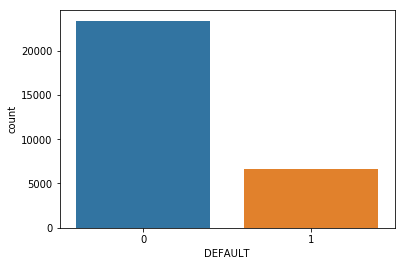

In [4]:
sns.countplot(data = df, x = 'DEFAULT')

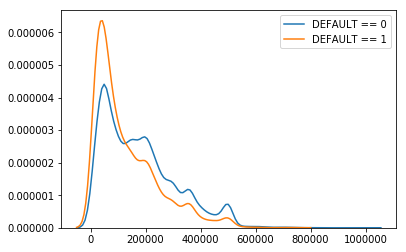

In [5]:
fig, ax = plt.subplots()
sns.kdeplot(df.loc[df.DEFAULT == 0, 'LIMIT_BAL'], ax=ax, label = 'DEFAULT == 0')
sns.kdeplot(df.loc[df.DEFAULT == 1, 'LIMIT_BAL'], ax=ax, label = 'DEFAULT == 1')

In [6]:
df['LIMIT_BAL_BINS'] = (df.LIMIT_BAL>150000).astype('int')

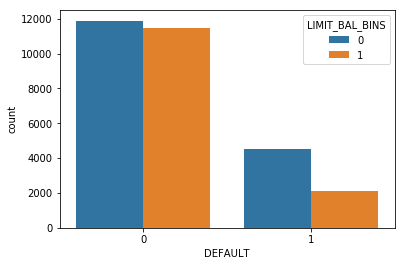

In [7]:
sns.countplot(data = df, x = 'DEFAULT', hue = 'LIMIT_BAL_BINS')

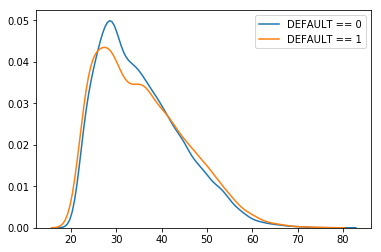

In [8]:
fig, ax = plt.subplots()
sns.kdeplot(df.loc[df.DEFAULT == 0, 'AGE'], ax=ax, label = 'DEFAULT == 0')
sns.kdeplot(df.loc[df.DEFAULT == 1, 'AGE'], ax=ax, label = 'DEFAULT == 1')

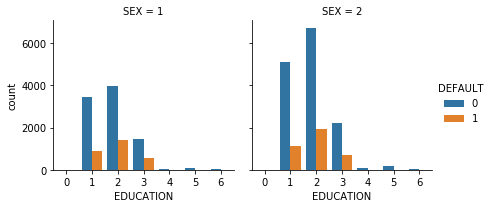

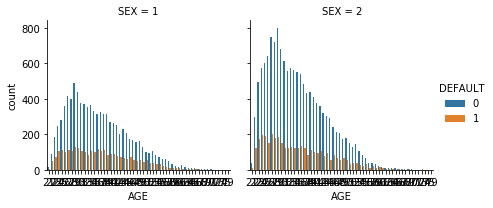

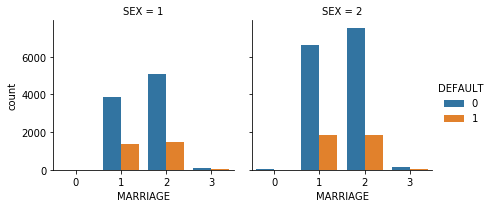

In [8]:
var = ['EDUCATION', 'AGE', 'MARRIAGE']
for i in range(len(var)):
    sns.catplot(data = df, x=var[i], hue = 'DEFAULT', col = 'SEX', kind='count', height=3)

In [9]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT',
       'LIMIT_BAL_BINS'],
      dtype='object')

In [10]:
df_pay = df.melt(id_vars=['ID'],value_vars=['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], var_name='PAY_Month', value_name = 'PAY')
pay_to_month = {'PAY_0' : 1, 'PAY_2' : 2, 'PAY_3' : 3, 'PAY_4' : 4, 'PAY_5' : 5, 'PAY_6' : 6}
df_pay['Month'] = df_pay.PAY_Month.map(pay_to_month)
df_pay = df_pay.drop('PAY_Month', axis = 1)

df_bill = df.melt(id_vars=['ID'],value_vars=['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], var_name='Bill_Month', value_name = 'Bill_AMT')
bill_to_month = {'BILL_AMT1' : 1, 'BILL_AMT2' : 2, 'BILL_AMT3' : 3, 'BILL_AMT4' : 4, 'BILL_AMT5' : 5, 'BILL_AMT6' : 6}
df_bill['Month'] = df_bill.Bill_Month.map(bill_to_month)
df_bill = df_bill.drop('Bill_Month', axis = 1)

df_payamt = df.melt(id_vars=['ID'],value_vars=['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], var_name='Pay_Month', value_name = 'Pay_AMT')
payamt_to_month = {'PAY_AMT1' : 1, 'PAY_AMT2' : 2, 'PAY_AMT3' : 3, 'PAY_AMT4' : 4, 'PAY_AMT5' : 5, 'PAY_AMT6' : 6}
df_payamt['Month'] = df_payamt.Pay_Month.map(payamt_to_month)
df_payamt = df_payamt.drop('Pay_Month', axis = 1)

In [11]:
df_pay_bill = pd.merge(left=df_pay, right = df_bill, on=['ID', 'Month'])
df_pay_bill_payamt = pd.merge(left = df_pay_bill, right=df_payamt, on = ['ID', 'Month'])
cols = ['ID', 'LIMIT_BAL', 'LIMIT_BAL_BINS', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'DEFAULT']
df2 = pd.merge(left = df[cols], right= df_pay_bill_payamt, how = 'right', on = 'ID')
df2.head()

,ID,LIMIT_BAL,LIMIT_BAL_BINS,SEX,EDUCATION,MARRIAGE,AGE,DEFAULT,PAY,Month,Bill_AMT,Pay_AMT
0,1,20000,0,2,2,1,24,1,2,1,3913,0
1,1,20000,0,2,2,1,24,1,2,2,3102,689
2,1,20000,0,2,2,1,24,1,-1,3,689,0
3,1,20000,0,2,2,1,24,1,-1,4,0,0
4,1,20000,0,2,2,1,24,1,-2,5,0,0


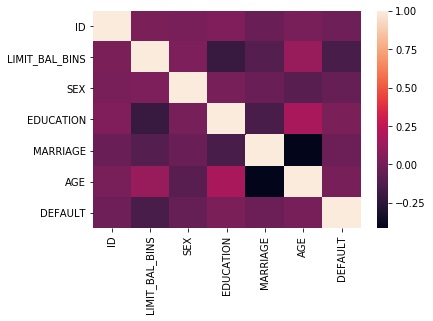

In [12]:
df3 = df2.drop(['Month', 'Bill_AMT', 'Pay_AMT', 'PAY', 'LIMIT_BAL'], axis = 1)
df3 = df3.drop_duplicates()
sns.heatmap(df3.corr())

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df21 = df2.copy()
ss = StandardScaler()
cols_num = ['PAY', 'Bill_AMT', 'Pay_AMT']
for i in cols_num:
    df21[i+'_Norm'] = ss.fit_transform(df21[[i]])
df21 = df21.drop(['PAY', 'Bill_AMT', 'Pay_AMT'], axis = 1)

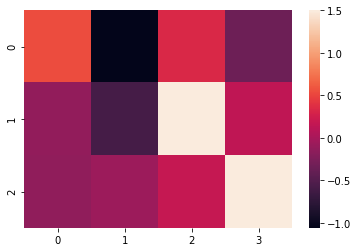

In [14]:
km = KMeans(4)
km = km.fit(df21.loc[:, ['PAY_Norm', 'Bill_AMT_Norm', 'Pay_AMT_Norm']])
sns.heatmap(km.cluster_centers_.T, vmax=1.5)

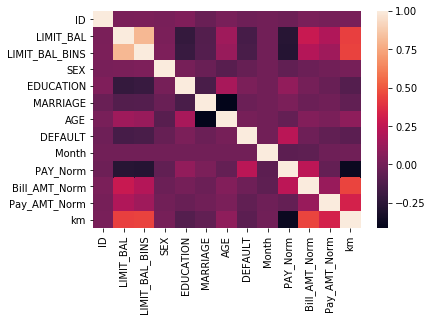

In [15]:
df21['km'] = km.predict(df21.loc[:, ['PAY_Norm', 'Bill_AMT_Norm', 'Pay_AMT_Norm']])
sns.heatmap(df21.corr())

In [16]:
from scipy import stats

mean_df2 = df21.groupby('ID').mean().loc[:,['PAY_Norm', 'Bill_AMT_Norm', 'Pay_AMT_Norm']]
mean_df2.columns = ['PAY_Mean_Norm', 'Bill_AMT_Mean_Norm', 'Pay_AMT_Mean_Norm']
df4 = df21.merge(how='left', on='ID', right = mean_df2)

km_mode = df4.groupby('ID').agg(lambda x: stats.mode(x)[0][0]).loc[:,['km']]
df4 = df4.merge(how='left', on='ID', right = km_mode)

df4 = df4.drop(['Month', 'Bill_AMT_Norm', 'Pay_AMT_Norm', 'PAY_Norm', 'km_x', 'LIMIT_BAL'], axis = 1)
df4 = df4.drop_duplicates()

In [17]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cols = ['EDUCATION', 'km_y', 'MARRIAGE']

df5 = df4.copy()
for i in cols:
    new_cols = ohe.fit_transform(df4[[i]]).toarray()
    new_cols_df = pd.DataFrame(new_cols, index = df4.index, columns=[i+'_'+str(j) for j in range(new_cols.shape[1])])
    df5 = df5.join(new_cols_df)

df5 = df5.drop(cols, axis = 1)
df5.AGE = df5.AGE/80
df5.SEX = df5.SEX - 1

In [29]:
sp1 = spark.createDataFrame(df5)

In [40]:
df5.head()

,ID,LIMIT_BAL_BINS,SEX,AGE,DEFAULT,PAY_Mean_Norm,Bill_AMT_Mean_Norm,Pay_AMT_Mean_Norm,EDUCATION_0,EDUCATION_1,...,EDUCATION_5,EDUCATION_6,km_y_0,km_y_1,km_y_2,km_y_3,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,0,1.0,0.3000,1,-0.129452,-0.653751,-0.289149,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6,2,0,1.0,0.3250,1,0.585464,-0.630377,-0.248890,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
12,3,0,1.0,0.4250,0,0.156514,-0.419467,-0.192689,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
18,4,0,1.0,0.4625,0,0.156514,-0.096078,-0.217250,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
24,5,0,0.0,0.7125,0,-0.129452,-0.400300,0.255858,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [87]:
from pyspark.ml.feature import VectorAssembler

cols = df5.columns
cols = list(cols.drop(['ID', 'DEFAULT']))
va = VectorAssembler(inputCols=cols, outputCol='features')
dataset = va.transform(sp1).select('features', 'DEFAULT')

trainSet, testSet = dataset.randomSplit([0.8,0.2])

In [102]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol='features', labelCol='DEFAULT')
lrModel = lr.fit(trainSet)
predictions = lrModel.transform(testSet)

evaluator = BinaryClassificationEvaluator(labelCol='DEFAULT', rawPredictionCol='prediction')
metrics = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})
print("Linear Regression: \nAUC =", metrics)

Linear Regression: 
AUC = 0.5782924260959039


In [100]:
from pyspark.ml.regression import DecisionTreeRegressor

dt = DecisionTreeRegressor(featuresCol='features', labelCol='DEFAULT')
dtModel = dt.fit(trainSet)
predictions = dtModel.transform(testSet)

evaluator = BinaryClassificationEvaluator(labelCol='DEFAULT', rawPredictionCol='prediction')
metrics = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})
print("Decision Tree: \nAUC =", metrics)

Exception ignored in: <object repr() failed>
Traceback (most recent call last):
  File "C:\Spark\spark-2.3.2-bin-hadoop2.7\python\pyspark\ml\wrapper.py", line 105, in __del__
    SparkContext._active_spark_context._gateway.detach(self._java_obj)
AttributeError: 'BinaryClassificationEvaluator' object has no attribute '_java_obj'


Decision Tree: 
AUC = 0.744385446987514


In [99]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import BinaryClassificationEvaluator

rf = RandomForestRegressor(featuresCol='features', labelCol='DEFAULT')
rfModel = rf.fit(trainSet)
predictions = rfModel.transform(testSet)

evaluator = BinaryClassificationEvaluator(labelCol='DEFAULT', rawPredictionCol='prediction')
metrics = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})
print("Random Forest: \nAUC =", metrics)

Random Forest: 
AUC = 0.7585278397390041


We could then after chosing the random forest optimize all the parameters using grid search. We could also add noisy data